 This is a predictive modelling project for Autisim Detection in Toddlers 

# Introduction

The project is on ASD screening of toddlers. ASD is Autistic Spectrum Disorder. As it is been found that Clinics to detect Autism in toddlers are less and parents need to take appointments which result in waiting period of 1 or 2 months. Every time its not necessary that a child will have Autism just because their parents want to confirm. It is waste of money and time for parents. To save the time and money there are some pre-screening process that can be done. In the pre-screening process, we can ask parents some questions and depending on those questions we can predict that a child needs to be sent to clinic for further diagnosis. The pre-screening process should be done by parents and answer questions related to their child’s behavior and different activities. In this way not every child and parent will be suffered in the long waiting period of clinic. 

# Dataset

The data used is originally from Kaggle repository(https://www.kaggle.com/fabdelja/autism-screening-for-toddlers#Toddler%20Autism%20dataset%20July%202018.csv). The data consists of around 1000 observations of toddlers from ASD screening centers for Autism.

# Project Definition

To Predict if a toddler is showing traits for Autism so that he/she should go for further ASD diagnosis clinic.

# Data Exploration

In [844]:
import numpy as np
import pandas as pd

Load csv file

In [845]:
df = pd.read_csv('/Users/karis/Toddler Autism dataset July 2018.csv')

In [846]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


Total rows and columns.

In [847]:
df.shape

(1054, 19)

Changing the name of column 18 to 'Detected' as its an important feature. 

In [848]:
df=df.rename(columns={ df.columns[18]: "Detected"})

Checking for Null values in the dataset

In [849]:
df.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Detected                  0
dtype: int64

There are no Null values in the dataset.

In [850]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [851]:
print('Number of samples:',len(df))

Number of samples: 1054


In [852]:
df.groupby('Detected').size()

Detected
No     326
Yes    728
dtype: int64

Creating positive and negative class of dataset in 'OUTPUT_LABEL'. '0' is for negative class and '1' is for positive class.

In [853]:
df['OUTPUT_LABEL'] = (df.Detected=='Yes').astype('int')

In [854]:
df.groupby('OUTPUT_LABEL').size()

OUTPUT_LABEL
0    326
1    728
dtype: int64

In [855]:
df[['OUTPUT_LABEL']].head()

,OUTPUT_LABEL
0,0
1,1
2,1
3,1
4,1


Calculating the prevalence of positive class.

In [856]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [857]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.691


According to my dataset, I can say that 69.1% children show the traits of Autism based on different parameters and should be sent for further ASD screening process in clinic.

## Describing columns and Unique Dataset.

In [858]:
print('Number of columns:',len(df.columns))

Number of columns: 20


In [859]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Detected',
       'OUTPUT_LABEL'],
      dtype='object')

In [860]:
df[list(df.columns)[0:11]].head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,1,0,0,0,0,0,0,1,1,0,1
1,2,1,1,0,0,0,1,1,0,0,0
2,3,1,0,0,0,0,0,1,1,0,1
3,4,1,1,1,1,1,1,1,1,1,1
4,5,1,1,0,1,1,1,1,1,1,1


In [861]:
df[list(df.columns)[11:22]].head()

,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Detected,OUTPUT_LABEL
0,28,3,f,middle eastern,yes,no,family member,No,0
1,36,4,m,White European,yes,no,family member,Yes,1
2,36,4,m,middle eastern,yes,no,family member,Yes,1
3,24,10,m,Hispanic,no,no,family member,Yes,1
4,20,9,f,White European,no,yes,family member,Yes,1


In [862]:
df.groupby('Who completed the test').size()

Who completed the test
Health Care Professional      24
Health care professional       5
Others                         3
Self                           4
family member               1018
dtype: int64

Unique Dataset:

In [863]:
# your code here
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

Case_No: 1054 unique values
A1
[0 1]
A2
[0 1]
A3
[0 1]
A4
[0 1]
A5
[0 1]
A6
[0 1]
A7
[1 0]
A8
[1 0]
A9
[0 1]
A10
[1 0]
Age_Mons
[28 36 24 20 21 33 22 17 25 15 18 12 29 35 32 19 14 13 30 23 34 26 31 27
 16]
Qchat-10-Score
[ 3  4 10  9  8  5  6  2  0  7  1]
Sex
['f' 'm']
Ethnicity
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']
Jaundice
['yes' 'no']
Family_mem_with_ASD
['no' 'yes']
Who completed the test
['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others']
Detected
['No' 'Yes']
OUTPUT_LABEL
[0 1]


The dataset has a mix of both categorical and numerical data. Let's explore more columns. 
There are 20 columns. 
The columns Named "A1,A2....,A10" are different questions asked to parents of the toddler at the initial screening. Based on the answer to these questions we got the Qchat-10-Score column. The answers were either yes or no and the values 1 or 0 were assigned to the respective answer. 
From analysis of the columns, we can see there are a mix of categorical (non-numeric) and numerical data. A few things to point out,
Jaundice and Family_mem_with_ASD are categorial data but are important feature for prediction.
Age_Mons and Who completed the test are not important feature of prediction.
Case_No is a identifier.

# Feature Engineering

In my dataset we describe the features of the data first. The features can be put in to categories based on our data set, which are Numerical features and Categorial(Non-numerical) features. In Feature Engineering process we create new outputs(features) for our data set using our exsisting features. This helps in when we have huge amount of data and we need only few features to define our predictive models. This helps us focus on only the highlighted data. Then , I have done one-hot encoding on 'Ethinicity' and showed Ordinal features of 'Q-chat-score'.

In [864]:
import numpy as np

In [865]:
# replace ? with nan
df = df.replace('?',np.nan)

## Numerical Features

These features are numerical. They do not need any changes. 

In [866]:
cols_num = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons']

In [867]:
df[cols_num].isnull().sum()

A1          0
A2          0
A3          0
A4          0
A5          0
A6          0
A7          0
A8          0
A9          0
A10         0
Age_Mons    0
dtype: int64

No Missing values in Numerical features.

## Categorical Features

They are non- numerical features like 'Sex' or 'Ethnicity' in my dataset. To convert them to numerical we use one-hot encoding.

In [868]:
cols_cat = ['Sex','Jaundice','Family_mem_with_ASD','Who completed the test']

In [869]:
df[cols_cat].isnull().sum()

Sex                       0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
dtype: int64

No Missing values in categorial features.

As we know to convert the categorial feature to numerical we need to do one-hot endcoding. But what features are important to us for lets check that. So, I have choosen 'Ethnicity' feature as it can be aan important feature.

In [870]:
print('Ethnicity:', df.Ethnicity.nunique())
df.groupby('Ethnicity').size().sort_values(ascending = False)

Ethnicity: 11


Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
dtype: int64

There are 11 variables in 'Ethnicity feature'.

In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. For example, for the column Enticity, we would create new columns. We also did the same with coloumns Jaundice, Sex, Family_mem_with_ASD. 

In [871]:
df.Ethnicity.head()

0    middle eastern
1    White European
2    middle eastern
3          Hispanic
4    White European
Name: Ethnicity, dtype: object

In [872]:
pd.get_dummies(df['Ethnicity'],prefix = 'Ethnicity').head()

,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian
0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0


In [873]:
pd.get_dummies(df['Ethnicity'],prefix = 'Ethnicity', drop_first = True).head()

,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


We send all the columns at once into the get_dummies function and use the column name as the prefix.

In [874]:
pd.get_dummies(df[cols_cat],drop_first = True).head()

,Sex_m,Jaundice_yes,Family_mem_with_ASD_yes,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member
0,0,1,0,0,0,0,1
1,1,1,0,0,0,0,1
2,1,1,0,0,0,0,1
3,1,0,0,0,0,0,1
4,0,0,1,0,0,0,1


Now we are ready to make all of our categorical features

In [875]:
df_cat = pd.get_dummies(df[cols_cat],drop_first = True)

In [876]:
df_cat.head()

,Sex_m,Jaundice_yes,Family_mem_with_ASD_yes,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member
0,0,1,0,0,0,0,1
1,1,1,0,0,0,0,1
2,1,1,0,0,0,0,1
3,1,0,0,0,0,0,1
4,0,0,1,0,0,0,1


To add the one-hot encoding columns to the dataframe we can use concat function. Make sure to use axis = 1 to indicate add the columns.

In [877]:
df = pd.concat([df,df_cat], axis = 1)

In [878]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Who completed the test,Detected,OUTPUT_LABEL,Sex_m,Jaundice_yes,Family_mem_with_ASD_yes,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member
0,1,0,0,0,0,0,0,1,1,0,...,family member,No,0,0,1,0,0,0,0,1
1,2,1,1,0,0,0,1,1,0,0,...,family member,Yes,1,1,1,0,0,0,0,1
2,3,1,0,0,0,0,0,1,1,0,...,family member,Yes,1,1,1,0,0,0,0,1
3,4,1,1,1,1,1,1,1,1,1,...,family member,Yes,1,1,0,0,0,0,0,1
4,5,1,1,0,1,1,1,1,1,1,...,family member,Yes,1,0,0,1,0,0,0,1


In [879]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Detected',
       'OUTPUT_LABEL', 'Sex_m', 'Jaundice_yes', 'Family_mem_with_ASD_yes',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member'],
      dtype='object')

Save the column names of the categorical data.

In [880]:
cols_all_cat = list(df_cat.columns)

## Ordinal Features

In column Qchat-10-Score, you would think of these as numerical data, but they are categorical in this dataset as shown below.

In [881]:
df['Qchat-10-Score'].head()

0     3
1     4
2     4
3    10
4     9
Name: Qchat-10-Score, dtype: int64

In [882]:
df.groupby('Qchat-10-Score').size()

Qchat-10-Score
0      54
1      88
2      88
3      96
4     110
5     120
6      96
7     135
8      97
9      95
10     75
dtype: int64

## Engineering Features Summary

In [883]:
print('Total number of features:', len(cols_num + cols_all_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 18
Numerical Features: 11
Categorical Features: 7


Let's check if we are missing any data. 

In [884]:
df[cols_num + cols_all_cat ].isnull().sum().sort_values(ascending = False).head(10)

Who completed the test_family member    0
Who completed the test_Self             0
A2                                      0
A3                                      0
A4                                      0
A5                                      0
A6                                      0
A7                                      0
A8                                      0
A9                                      0
dtype: int64

Making a new dataframe that has important columns. 

In [885]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [886]:
print(df.nunique())

Case_No                                            1054
A1                                                    2
A2                                                    2
A3                                                    2
A4                                                    2
A5                                                    2
A6                                                    2
A7                                                    2
A8                                                    2
A9                                                    2
A10                                                   2
Age_Mons                                             25
Qchat-10-Score                                       11
Sex                                                   2
Ethnicity                                            11
Jaundice                                              2
Family_mem_with_ASD                                   2
Who completed the test                          

In [887]:
df.isna().sum()

Case_No                                            0
A1                                                 0
A2                                                 0
A3                                                 0
A4                                                 0
A5                                                 0
A6                                                 0
A7                                                 0
A8                                                 0
A9                                                 0
A10                                                0
Age_Mons                                           0
Qchat-10-Score                                     0
Sex                                                0
Ethnicity                                          0
Jaundice                                           0
Family_mem_with_ASD                                0
Who completed the test                             0
Detected                                      

Check a few things to catch known bugs. 

In [888]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in cols_input'

set()


In [889]:
# check for duplicated columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [890]:
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(df_data.columns), 'issue with dimensions of df_data or cols_input'

# Building Training/Validation/Test Samples

Training test samples are used to fit the model.
Validation samples are used for providing an unbiased evaluation of model fit on the training sample.
Test samples are used for providing final unbiased evaluation of model fit.

Week 2: Create a training (df_train_all), validation (df_valid) and test (df_test) set. 

In [891]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [892]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [893]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [894]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

Ckeck the prevalence:

In [895]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 158):0.734
Valid prevalence(n = 158):0.684
Train all prevalence(n = 738):0.683


Verifying that we used all the data

In [896]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 1054)


Week 2: take your df_train_all and create a balanced dataset. Briefly explain in your own words why we need to balance and a few techniques for balancing the dataset. 

Balancing the dataset will give us unbiased results as the samples will have proportionate of both negative and positive values.

Techniques used for balancing dataset are: Sub sampling Over sampling Creating synthetic samples

In [897]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]
n = np.min([len(df_train_pos), len(df_train_neg)])

# merge the balanced data
df_train = pd.concat([df_train_pos.sample(n = n, random_state = 42), 
                      df_train_neg.sample(n = n, random_state = 42)],axis = 0, 
                     ignore_index = True)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 468):0.500


Week 2: Save all 4 dataframes to csv and the cols_input

In [898]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [899]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Week 2: fill any missing values with the mean value

In [900]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [901]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [902]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,A1,0.563686
1,A2,0.434959
2,A3,0.391599
3,A4,0.494580
4,A5,0.525745


In [903]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [904]:
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (738, 18)
Training shapes: (468, 18) (468,)
Validation shapes: (158, 18) (158,)


Week 2: create a scalar, save it, and scale the X matrices

In [905]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [906]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [907]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [908]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Model Selection 

In [909]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [910]:
thresh = 0.5

## Model Selection: baseline models

### K nearest neighbors (KNN)

The KNN Nearest Neighbors algorithm is used for Classification. It is commonly used because it is easy to interpret, and it take less time to calculate. It is based on feature similarity. An item is classified by a majority vote of its neighbors, with the item being allocated to the class most basic among its k closest neighbors. It is simple, versatile, no assumptions of data and has high accuracy.

training a KNN model to evaluate performance.

In [911]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [912]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.994
accuracy:0.944
recall:0.897
precision:0.991
specificity:0.991
prevalence:0.500
 
Validation:
AUC:0.990
accuracy:0.918
recall:0.889
precision:0.990
specificity:0.980
prevalence:0.684
 


### Logistic Regression

It is statistics model which uses logistic function to model binary dependent variable. Like other analysis, Logistic Regression is a predictive examination. Logistic Regression is utilized to depict information and to clarify the connection between one ward parallel variable and at least one nominal, ordinal, interval or proportion level free factors. It is easy to implement and in training the model it is very efficient.

Training a logistic regression to evaluate the performance.

In [913]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [914]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:1.000
accuracy:0.996
recall:0.991
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:1.000
accuracy:0.981
recall:0.972
precision:1.000
specificity:1.000
prevalence:0.684
 


### Stochastic Gradient Descent

It is an optimization method used for finding values of coefficients of a function to minimize the cost of function. Used when we cannot calculate the coefficients analytically and we need optimization for it. It is used when we have huge amount of data and Gradient Descent algorithm doesn’t work or works slowly. In this variety, the gradient descent method depicted above is run yet the update to the coefficients is performed for each training instance, as opposed to toward the finish of the group of cases. Efficient, easy to imply for large scale machine learning problems.

Training a stochastic gradient descent model to evaluate the performance

In [915]:
# your code here
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [916]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:1.000
accuracy:0.966
recall:0.932
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.999
accuracy:0.968
recall:0.954
precision:1.000
specificity:1.000
prevalence:0.684
 


### Naive Bayes

It is a supervised learning algorithm. It is based of application of Bayes theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.  It is a classification method. It assumes independence in between predictors, which means that a feature is not dependent upon any other feature in a class. It is easy to build. Good to be used for large dataset. It always outperforms any high classification method. It performs well with categorial variables than the numerical ones.

Training Naive Bayes model and evaluating the performance.

In [917]:
# your code here
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None)

In [918]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.995
accuracy:0.675
recall:1.000
precision:0.606
specificity:0.350
prevalence:0.500
 
Validation:
AUC:0.991
accuracy:0.785
recall:1.000
precision:0.761
specificity:0.320
prevalence:0.684
 


### Decision Tree Classifier

It is classification algorithm which works on tree structure. Tree structure is basically a flow chart. Decision Tree Classifier is generally utilized arrangement method. It applies a thought to take care of the characterization issue. Decision Tree Classifier represents a progression of series of carefully crafted questions concerning the characteristics of the test record. Each time it gets an answer, a subsequent question is posed until a decision about the class name of the record is come to. The decision tree classifiers sorted out a progression of test questions and conditions in a tree structure.

Training Decision Tree model and evaluating the performance.

In [919]:
# your code here
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [920]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.881
accuracy:0.873
recall:0.861
precision:0.949
specificity:0.900
prevalence:0.684
 


### Random Forest

It is a supervised machine learning algorithm. It is easy to use and is flexible. Without using hyper parameter tuning it produces outputs. It is used for both classification and regression methods. It creates random forests which is obtained from merging of decision trees for more accurate and stable predictions. Random Forest adds extra arbitrariness to the model, while developing the trees. Rather than looking for the most significant component while part a node, it scans for the best element among a random subset of features. This outcomes in a wide assorted variety that by and large outcomes in a superior model. It uses only random subset of features to split the node.

Training Random Forest model and evaluating the performance

In [921]:
# your code here
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [922]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.999
accuracy:0.989
recall:0.983
precision:0.996
specificity:0.996
prevalence:0.500
 
Validation:
AUC:0.984
accuracy:0.918
recall:0.917
precision:0.961
specificity:0.920
prevalence:0.684
 


### Gradient Boosting Classifier

It gives a prediction model in the form of an ensemble of decision trees. It is used for both classification as well as regression methods. It is boosting method in which each new tree is fit on a modified version of original data set. It trains models in a gradual, additive and sequential manner. The gradient boosting model identifies the defects by using gradients in the loss function. A loss function depends on what we are trying to optimize, and it is a measure to know good the model coefficients are fitting the data. It enables one to improve a client indicated cost work, rather than a loss that normally offers less control and does not basically relate with certifiable applications. 

Training Gradient Boosting model and evaluating the performance.

In [923]:
# your  code here
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [924]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.991
accuracy:0.956
recall:0.954
precision:0.981
specificity:0.960
prevalence:0.684
 


## Analyze results baseline models

Let's make a dataframe with these results and plot the outcomes using a package called seaborn.

In [925]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

In [926]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

Week 3: Pick one performance metric that you will use for picking the best model. Explain your choice of performance metric. Make a bar plot of this performance metric below to demonstrate the baseline performance. 

I am picking Random Forest as my Area under the curve and recall factor of test and validation data are giving best results.

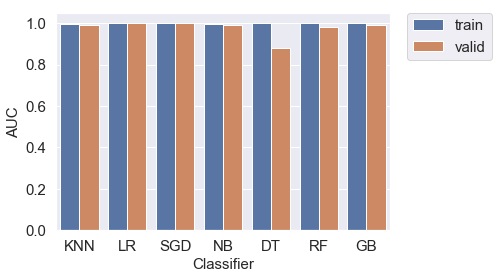

In [927]:
# Your code here
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

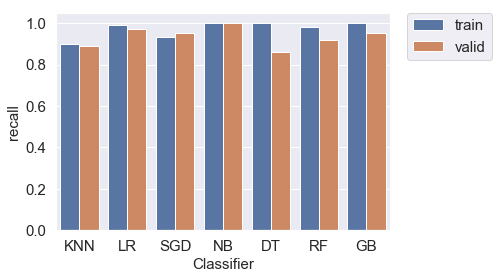

In [928]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('recall', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

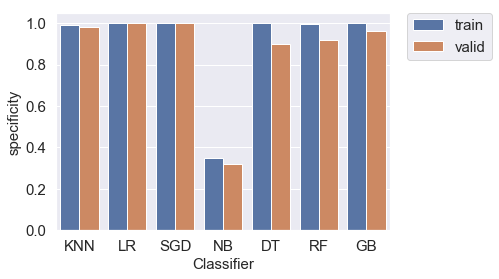

In [929]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

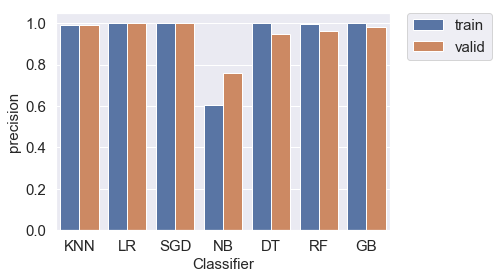

In [930]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('precision', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

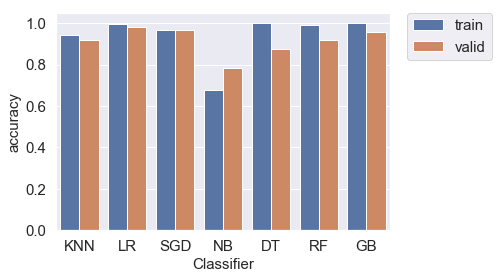

In [931]:
ax = sns.barplot(x="classifier", y="accuracy", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('accuracy', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

My current best model is: Logistic Regression model

In [932]:
import time

my_params = [5,10,15,20,25,30] # your list of parameters

# initialize arrays for storing the results
train_aucs = np.zeros(len(my_params))
valid_aucs = np.zeros(len(my_params))

# train a model for each K in a list. Store the auc for the training and validation set
t1 = time.time()
for jj in range(len(my_params)):
    my_param = my_params[jj]
    
    # fit model
    model = RandomForestClassifier(max_depth = my_param, random_state = 42)
    model.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid
    
    # print the time
    t2 = time.time()
    print(my_param, t2-t1)
    t1 = time.time()

5 0.01793980598449707
10 0.01396322250366211
15 0.010970592498779297
20 0.012965917587280273
25 0.011967658996582031
30 0.011968374252319336


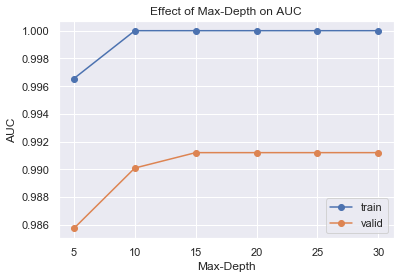

In [933]:
import matplotlib.pyplot as plt

plt.plot(my_params, train_aucs,'o-',label = 'train')
plt.plot(my_params, valid_aucs,'o-',label = 'valid')

plt.xlabel('Max-Depth') # fill this in
plt.ylabel('AUC')# fill this in
plt.title('Effect of Max-Depth on AUC') # fill this in
plt.legend()
plt.show()

## Learning Curves

Week 4: Using your baseline model that has the best performance on the validation set, plot a learning curve for that model. 

In [934]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

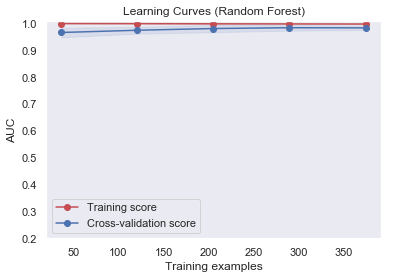

In [935]:
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.


title = "Learning Curves (Random Forest)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 5, random_state = 42)                                  # fill this in
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

My best perfomance model of Random Forest classifier is high bias which is also known as underfitting. It means that the model is not capturing all the signals as it would from data. It is a measure of model rigidity and inflexibility.
To improve this model the techniques we can use is to add more features, Regularization,Change model architecture.

## Feature Importance

Week 4: Plot the feature importance for logistic regression and random forest models here. 

In [936]:
# Your code here
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [937]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [938]:
feature_importances

,importance
A9,1.599175
A2,1.523437
A6,1.411448
A8,1.354897
A4,1.304955
A7,1.241910
A5,1.233738
A10,1.223835
A1,1.094651
A3,1.011559


In [939]:
feature_importances.head()

,importance
A9,1.599175
A2,1.523437
A6,1.411448
A8,1.354897
A4,1.304955


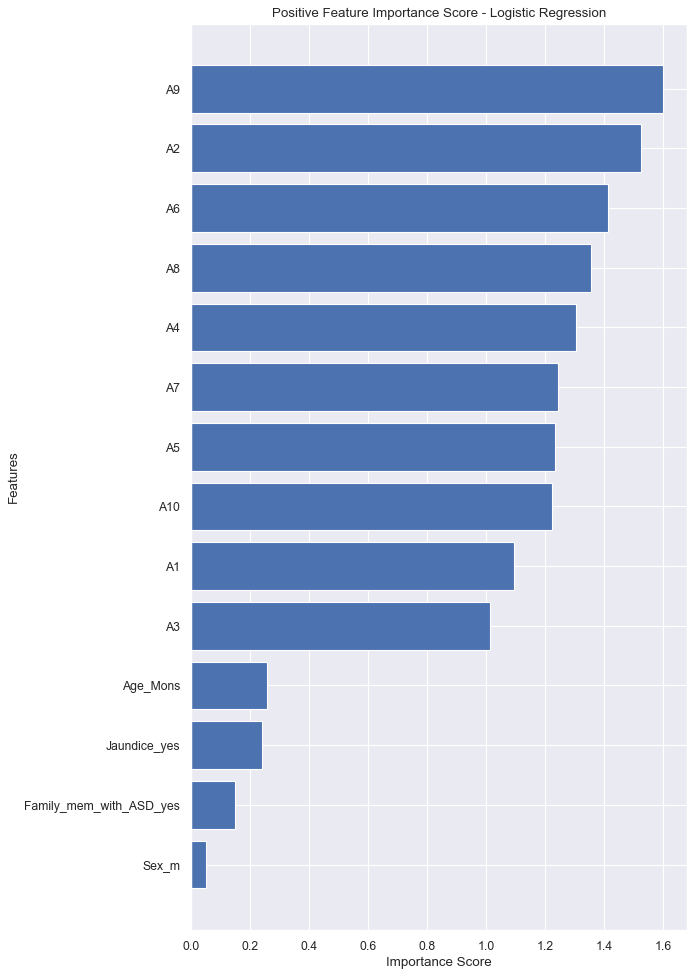

In [940]:
pos_features = feature_importances.loc[feature_importances.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

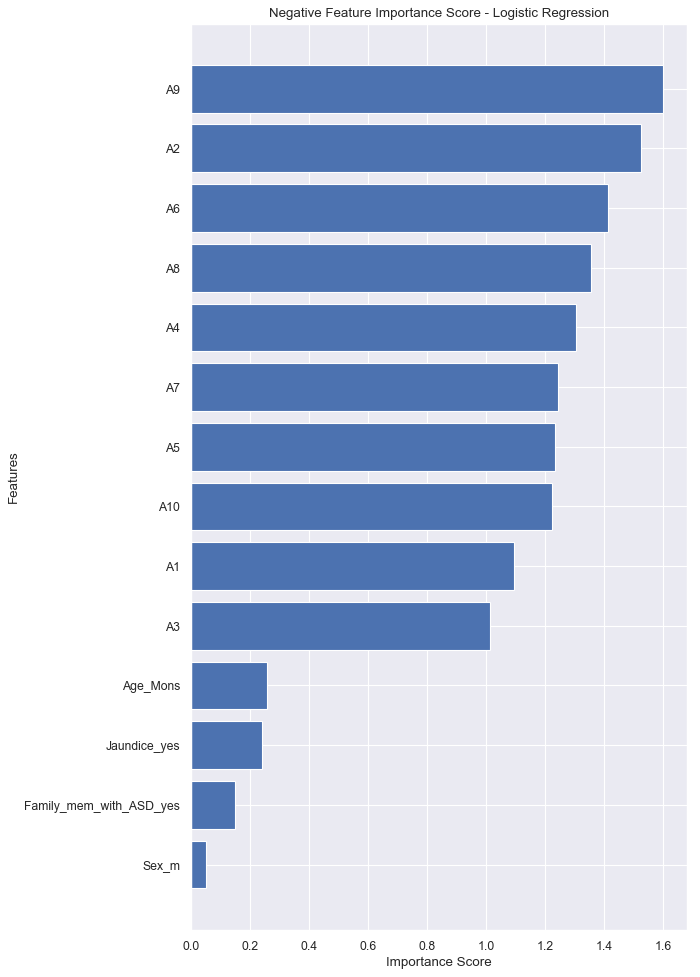

In [941]:
neg_features = feature_importances.loc[feature_importances.importance < 0]

num1 = np.min([50, len(neg_features)])

values_to_plot1 = neg_features.iloc[-num1:].values.ravel()
feature_labels1 = list(neg_features.iloc[-num1:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In [942]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [943]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
A6,0.185223
A5,0.179310
A2,0.124426
A9,0.110562
A1,0.091137


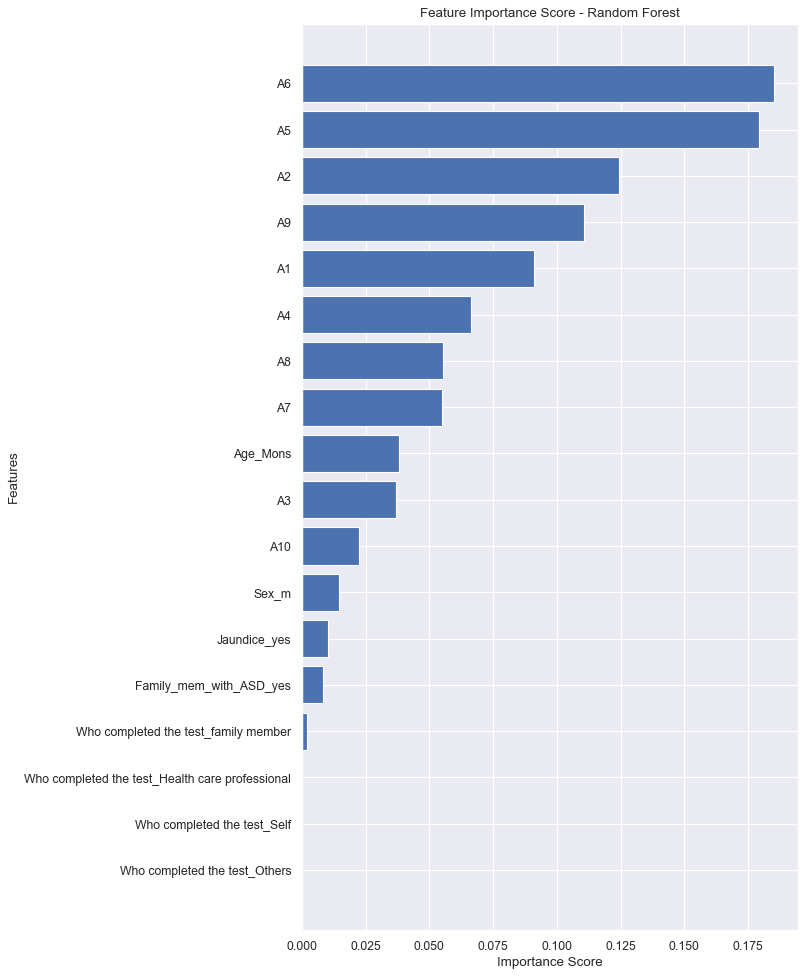

In [944]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

Week 4: Briefly discuss any observations you have of the feature importances. 

In feature importance it is observed that the question A9 is a positive important feature using logistic regression.Question A9 is as follows 'Does your child use simple gestures? (e.g. wave goodbye) '. It is a important feature as the gestures of the child can be a determining factor that the toddler has Autism or not. 
The Question A6 which is 'Does your child follow where you’re looking? ' is positive important feature using random forest. The child's eyesight can be a important factor for detection of ASD.

## Hyperparameter tuning

Week 4: Using RandomizedSearchCV, optimize a few of your baseline models. 
    Note that GradientBoosting Classifier may take a while so you might need to adjust the number of iterations or specific parameters. If this takes too long on your computer, feel free to take that one out. 

In [945]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

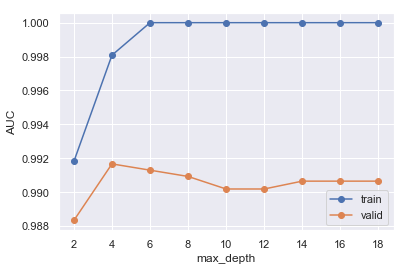

In [946]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [947]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [948]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [949]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [950]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [951]:
import time

In [952]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   19.2s finished


20.014477729797363


Week 4: Make a plot comparing the performance of the optimized models to the baseline models. 

In [953]:
# Your code here
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 18,
 'criterion': 'gini'}

In [954]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.999
Validation AUC:0.984
Optimized Random Forest
Training AUC:1.000
Validation AUC:0.993


In [955]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [956]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

0.6602284908294678


In [957]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 400, 'alpha': 0.001}

In [958]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:1.000
Validation AUC:0.999
Optimized sgdc
Training AUC:1.000
Validation AUC:1.000


In [959]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [960]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

1.6426472663879395


In [961]:
gbc_random.best_params_

{'n_estimators': 150, 'max_depth': 1, 'learning_rate': 0.1}

In [962]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:1.000
Validation AUC:0.991
Optimized gbc
Training AUC:1.000
Validation AUC:1.000


## Pick your best model

Week 4: Pick your best model. Explain why you picked it. Save the model using pickle.

In [963]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })

In [964]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.999074
1,SGD,optimized,1.000000
2,RF,baseline,0.984074
3,RF,optimized,0.992963
4,GB,baseline,0.991481
5,GB,optimized,1.000000


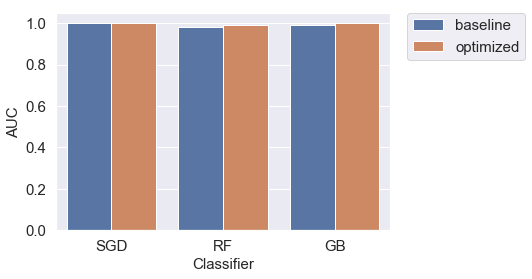

In [965]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

The best model for my prediction is Random forest. as the basline and optimized model give the similar result. 

In [966]:
pickle.dump(rf_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

WEEK 5: evaluate the performance of your best model on the training, validation and test sets. Make an ROC curve too.

In [967]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [968]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))


In [969]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [970]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [971]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [972]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.993
accuracy:0.930
recall:0.926
precision:0.971
specificity:0.940
prevalence:0.684
 
Test:
AUC:0.994
accuracy:0.956
recall:0.948
precision:0.991
specificity:0.952
prevalence:0.734
 


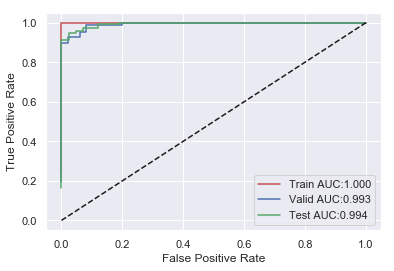

In [973]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

Briefly summarry

The project is to predict if the toddler shows Autism traits from pre-screening process, and should he/she be sent to further ASD diagnosis in clinics. The dataset had 1054 observations. It had both Numerical and Categorial features. The data had questions A1 to A10 asked to parents and there responses where given as 0 or 1. One hot encoding was done a feature for better prediction. Built a test,train and validation dataset. Check the performances of baseline model. Accordiing to AUC(Area under curve) the best model is Random Forest. To model is underfitted, so to improve it we can had more feature or regularize the model. Then hyper tuning was done to check optimize and baseline model. The best model for my prediction is Randome forest with Acurracy of 99.4% in test, 99.3% in validation, and 100% in train.